In [63]:
import numpy as np
import copy
from multiprocessing import Pool
import multiprocessing
from scipy import stats
import matplotlib.pyplot as plt

In [64]:
cur_dir = "results_01_06_TD(lambda)_gamma_05/"
powers_big = np.array([0.8,0.825,0.85,0.875,0.9,0.925,0.95]) # C = 2000, N_0 = 10**4
powers = np.array([0.55,0.6,0.65,0.7,0.75,0.8],dtype=float) #C = 300, N_0 = 2*10**4

In [65]:
res_indep = np.load(cur_dir+"all_res.npy")
norms = np.load(cur_dir+"TD0_error.npy")
norms_J0_rem = np.load(cur_dir+"TD0_J0_remainder.npy")
norms_J1_rem = np.load(cur_dir+"TD0_J1_remainder.npy")
norms_transient = np.load(cur_dir+"Transient.npy")
norms_J0 = np.load(cur_dir+"norms_J0.npy")
norms_J1 = np.load(cur_dir+"norms_J1.npy")
norms_H0 = np.load(cur_dir+"norms_H0.npy")
norms_H1 = np.load(cur_dir+"norms_H1.npy")

In [66]:
cur_dir_1 = "results_01_06_TD(lambda)_gamma_08/"
norms_J0_upd = np.load(cur_dir_1+"norms_J0.npy")
norms_J1_upd = np.load(cur_dir_1+"norms_J1.npy")
norms_H0_upd = np.load(cur_dir_1+"norms_H0.npy")
norms_H1_upd = np.load(cur_dir_1+"norms_H1.npy")

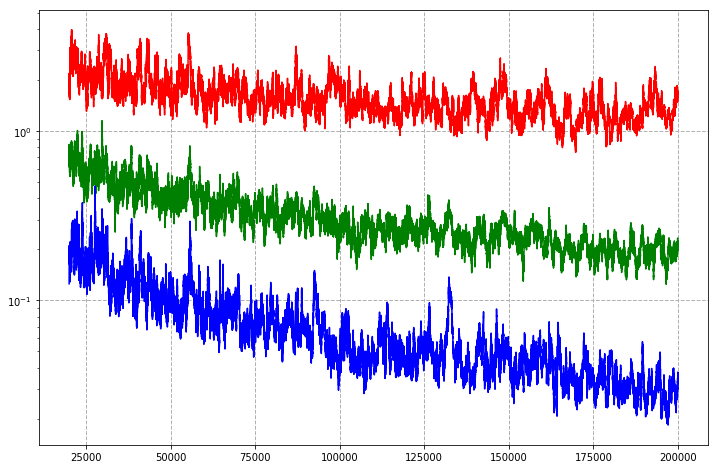

In [77]:
N_start = 2*10**4
N_last = 2*10**5
j = 3
plt.figure(figsize=(12,8)) 
plt.plot(np.arange(N_start,N_last), norms[j][N_start:N_last], color='r' ,label='MSE error, TD(0)') 
#plt.plot(np.arange(N_start,N_last), norms_1[j][N_start:N_last], color='g' ,label='MSE error, TD(0.9)') 
plt.plot(np.arange(N_start,N_last), norms_J0_rem[j][N_start:], color='g' ,label='MSE error without J_0') 
plt.plot(np.arange(N_start,N_last), norms_J1_rem[j][N_start:], color='b' ,label='MSE error without J_0, J_1')
#plt.plot(np.arange(N_start,N_last), norms_transient[j][N_start:], color='b' ,label='Transient')
#plt.xlabel('iteration number',fontsize = 18)
#plt.ylabel('cost',fontsize = 18) 
#plt.title('VR cost for MDCV, Gaussian distribution, quadratic target',fontsize = 20)
plt.yscale('log')
plt.grid(linestyle='--', linewidth=1.0)
#plt.legend() 
plt.show()
#plt.savefig("pics/TD_lambda_MSE.pdf")

### Calculate mean statistics

In [68]:
mean_norm_J0 = np.zeros(len(powers),dtype=float)
mean_norm_J1 = np.zeros(len(powers),dtype = float)

mean_norm_H0 = np.zeros(len(powers),dtype=float)
mean_norm_H1 = np.zeros(len(powers),dtype=float)
N_start = 1*10**5

for j in range(len(powers)):
    mean_norm_J0[j] = np.mean(norms_J0[j][N_start:]**2)
    mean_norm_J1[j] = np.mean(norms_J1[j][N_start:]**2)
    mean_norm_H0[j] = np.mean(norms_H0[j][N_start:]**2)
    mean_norm_H1[j] = np.mean(norms_H1[j][N_start:]**2)

In [69]:
mean_norm_J0_upd = np.zeros(len(norms_J0_upd),dtype=float)
mean_norm_J1_upd = np.zeros(len(norms_J0_upd),dtype = float)

mean_norm_H0_upd = np.zeros(len(norms_J0_upd),dtype=float)
mean_norm_H1_upd = np.zeros(len(norms_J0_upd),dtype=float)

N_start = 1*10**5

for j in range(len(powers_big)):
    mean_norm_J0_upd[j] = np.mean(norms_J0_upd[j][N_start:]**2)
    mean_norm_J1_upd[j] = np.mean(norms_J1_upd[j][N_start:]**2)
    mean_norm_H0_upd[j] = np.mean(norms_H0_upd[j][N_start:]**2)
    mean_norm_H1_upd[j] = np.mean(norms_H1_upd[j][N_start:]**2)

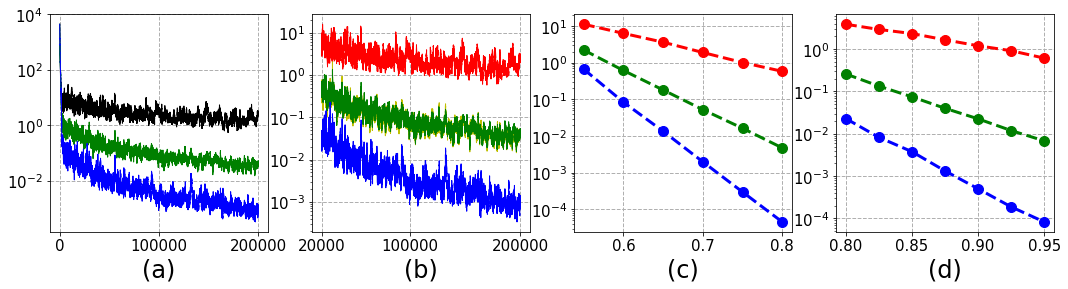

In [75]:
N_start_0 = 0
N_start_1 = 2*10**4
N_last = 2*10**5
j = 3
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18,4))
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)
#first plot: MSE
ax1.plot(np.arange(N_start_0,N_last), norms[j][N_start_0:N_last]**2, color='k', linewidth=1, label='MSE error, TD(0)') 
ax1.plot(np.arange(N_start_0,N_last), norms_J0_rem[j][N_start_0:]**2, color='g', linewidth=1, label='MSE error without J_0') 
ax1.plot(np.arange(N_start_0,N_last), norms_J1_rem[j][N_start_0:]**2, color='b', linewidth=1, label='MSE error without J_0, J_1')
ax1.set_yscale('log')
ax1.grid(linestyle='--', linewidth=1.0)
ax1.set_xlabel("(a)",fontsize=24)
major_ticks = [0, 100000, 200000]
#minor_ticks = [50000, 100000, 150000, 200000]
ax1.set_xticks(major_ticks)
#ax1.set_xticklabels(labels =[], fontsize=24)
#ax1.set_yticks(fontsize=24)

#second plot: J0, J1, H0, H1
ax2.plot(np.arange(N_start_1,N_last), norms_J0[j][N_start_1:]**2, color='r', linewidth=1, label='norm J_0')
ax2.plot(np.arange(N_start_1,N_last), norms_J1[j][N_start_1:]**2, color='y', linewidth=1, label='norm J_1')
ax2.plot(np.arange(N_start_1,N_last), norms_H0[j][N_start_1:]**2, color='g', linewidth=1, label='norm H_0') 
ax2.plot(np.arange(N_start_1,N_last), norms_H1[j][N_start_1:]**2, color='b', linewidth=1, label='norm H_1')
ax2.set_yscale('log')
ax2.grid(linestyle='--', linewidth=1.0)
ax2.set_xlabel("(b)",fontsize=24)
major_ticks = [20000, 100000, 200000]
#minor_ticks = [50000, 100000, 150000, 200000]
ax2.set_xticks(major_ticks)
#ax2.set_xticks(minor_ticks, minor=True)
#ax2.xticks(fontsize=24)
#ax2.yticks(fontsize=24)

#third plot: average norm versus gamma
#J_0
ax3.plot(powers, mean_norm_J0, linestyle='--', marker='o', color='r', linewidth=3, markersize=10, label='J_0')  
#J_1
ax3.plot(powers, mean_norm_J1, linestyle='--', marker='o', color='g', linewidth=3, markersize=10, label='J_1')
#H_1
ax3.plot(powers, mean_norm_H1, linestyle='--', marker='o', color='b', linewidth=3, markersize=10, label='H_1') 
#ax3.xticks(fontsize=24)
#ax3.yticks(fontsize=24)
ax3.set_yscale('log')
ax3.grid(linestyle='--', linewidth=1.0)
ax3.set_xlabel("(c)",fontsize=24)

#forth plot: average norm versus gamma
#J_0
ax4.plot(powers_big, mean_norm_J0_upd, linestyle='--', marker='o', color='r', linewidth=3, markersize=10, label='J_0')  
#J1
ax4.plot(powers_big, mean_norm_J1_upd, linestyle='--', marker='o', color='g', linewidth=3, markersize=10, label='J_1')
#H_1
ax4.plot(powers_big, mean_norm_H1_upd, linestyle='--', marker='o', color='b', linewidth=3, markersize=10, label='H_1') 
#ax3.xticks(fontsize=24)
#ax3.yticks(fontsize=24)
ax4.set_yscale('log')
ax4.grid(linestyle='--', linewidth=1.0)
ax4.set_xlabel("(d)",fontsize=24)
#plt.tight_layout()
fig.savefig("pics/TD_09_all.pdf",bbox_inches = "tight")

In [ ]:
plt.figure(figsize=(12,8)) 
#J_0
plt.plot(powers, mean_norm_J0, linestyle='--', marker='o', color='r', linewidth=3, markersize=12, label='J_0') 
#plt.plot(powers, np.exp(slope_J0*powers + intercept_J0), linestyle='--', marker='o', color='m',label='regressed J_0') 
#J_1
plt.plot(powers, mean_norm_J1, linestyle='--', marker='o', color='g', linewidth=3, markersize=12, label='J_1') 
#plt.plot(powers, np.exp(slope_J1*powers + intercept_J1), linestyle='--', marker='o', color='b',label='regressed J_1')
#H_1
plt.plot(powers, mean_norm_H1, linestyle='--', marker='o', color='b', linewidth=3, markersize=12, label='H_1') 
#plt.plot(powers, np.exp(slope_H1*powers + intercept_H1), linestyle='--', marker='o', color='y',label='regressed H_1')
#plt.xlabel('iteration number',fontsize = 18)
#plt.ylabel('cost',fontsize = 18) 
#plt.title('VR cost for MDCV, Gaussian distribution, quadratic target',fontsize = 20)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale('log')
plt.grid(linestyle='--', linewidth=1.0)
#plt.legend(loc='lower left') 
plt.show()
plt.savefig("pics/J_0_J_1_H_1_regressed_gamma_05.pdf")